<a href="https://colab.research.google.com/github/Ashish-AVS/Machine-Learning-Codes/blob/main/ML_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


https://drive.google.com/file/d/1zy8g9zC6qSu7fTFABtfdcYUyKBGZ24xq/view

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1zy8g9zC6qSu7fTFABtfdcYUyKBGZ24xq'})
fileDownloaded.GetContentFile('ML_dataset.csv')
df = pd.read_csv('ML_dataset.csv')
display(df)

## **Feature Engineering Task 1**

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns[1:]
#identifying which column contains continuous numeric data
num_cols

In [ ]:
categorical_cols = list(set(cols)-set(num_cols))
categorical_cols
#columns with categorical data

In [ ]:
#finding missing total missing values in each column
missing_values = sum(list(df.isna().sum()))
#print(missing_values)
#there were 7 missing values initially

In [ ]:
for col in df:
    if col not in ['id','diagnosis']:
        mean_value = df[col].mean()
        #calculating the mean value
        df[col].fillna(value=mean_value,inplace=True)
        #replacing empty cell with the mean value calculated as mentioned in task 1

## **Feature Engineering Task 2**

In [ ]:
df_norm = df
#here I created a dummy dataframe and normalized it as mentioned in task 2
for col in df_norm:
    if col not in ['id','diagnosis']:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()
df_norm

In [ ]:
missing_value1 = df['diagnosis'].isna().sum()
missing_value2 = df['id'].isna().sum()
#finding missing value in our categorical data
#here there was no missing value in both
print(missing_value1,missing_value2)

In [ ]:
df['diagnosis'].value_counts()

## **Perceptron Learning Algorithm**

In [ ]:
#task 2 was accomplished

class Perceptron:
    
    def __init__(self, learning_rate = 0.001, epochs = 1000):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z, 0)
    
#                       0   if x1 < 0
# heaviside(x1, x2) =  x2   if x1 == 0
# here x2 = 0
#                       1   if x1 > 0

    def fit(self, X, y):
        columns = X.shape[1]
        # This will give the number of columns is 2-d array 
        # Initializing weights and bias with zeros
        self.weights = np.zeros((columns))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

## **PM1**

In [ ]:

X = df.iloc[:, 2:].values
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)
  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
np.random.seed(1)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

 

In [ ]:
perceptron = Perceptron()

perceptron.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = perceptron.predict(X_test)

# Calculate the accuracy of the model on the testing dataset
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

## **PM2**

In [ ]:
X = df.iloc[:, 2:].values
# Get Malignant cancer datapoints and label them as 1, and begnign as 0
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)
  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
np.random.seed(1)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

# Shuffle the train_indices
np.random.shuffle(train_indices)
X_train, y_train = X[train_indices], y[train_indices]

X_test, y_test = X[test_indices], y[test_indices]

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

#accuracy of PM2 matches with accuracy of PM1

## **PM3**

In [ ]:
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)


np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")


In [ ]:

# # Set number of folds
# k = 5

# # Shuffle data and split into k folds
# n_samples = X.shape[0]
# fold_size = n_samples // k
# indices = np.random.permutation(n_samples)
# X_shuffled, y_shuffled = X[indices], y[indices]
# X_folds = [X_shuffled[i:i+fold_size] for i in range(0, n_samples, fold_size)]
# y_folds = [y_shuffled[i:i+fold_size] for i in range(0, n_samples, fold_size)]

# # Train and test model on each fold
# accuracies = []
# for i in range(k):
#     # Get training and test data
#     X_test_fold = X_folds[i]
#     y_test_fold = y_folds[i]
#     X_train_folds = X_folds[:i] + X_folds[i+1:]
#     y_train_folds = y_folds[:i] + y_folds[i+1:]
#     X_train = np.concatenate(X_train_folds)
#     y_train = np.concatenate(y_train_folds)

#     # Fit perceptron to training data
#     perceptron = Perceptron()
#     perceptron.fit(X_train, y_train)

#     # Test perceptron on test data and compute accuracy
#     y_pred = perceptron.predict(X_test_fold)
#     accuracy = np.mean(y_pred == y_test_fold)
#     accuracies.append(accuracy)

# # Compute average accuracy and variance
# mean_accuracy = np.mean(accuracies)
# variance = np.var(accuracies)

# print("Average accuracy:", mean_accuracy)
# print("Variance in accuracy:", variance) 

## **PM4**

In [ ]:
shuffled_cols = df.iloc[:, 2:].sample(frac=1, axis=1)
df2 = pd.concat([df.iloc[:, :2], shuffled_cols], axis=1)
X = df2.iloc[:, 2:].values
y = np.where(df2.iloc[:, 1].values == 'M', 1, 0)
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

#accuracy of PM2 matches with accuracy of PM1

## **Fisher’s Linear Discriminant Analysis**


In [ ]:
# Imports
import numpy as np
import pandas as pd
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
from scipy.stats import norm as norm
from sklearn.model_selection import train_test_split

In [ ]:
def find_predictions(X_test, W, threshold):
    
    # Project the Test data onto W
    proj_testdata = np.dot(W, X_test.transpose()).reshape(X_test.shape[0],1)
    
    # Compare with threshold
    predictions = (proj_testdata >= threshold).astype(int).reshape(X_test.shape[0],1)
    
    return proj_testdata, predictions

In [ ]:
def plot_projections(projections, y_test, threshold):
    proj_pred_data = pd.DataFrame(np.concatenate((projections, y_test.reshape(-1, 1)), axis=1))
    

    proj1_pred = proj_pred_data.loc[proj_pred_data[1] == 1][[0]]
    proj2_pred = proj_pred_data.loc[proj_pred_data[1] == 0][[0]]    
    plt.figure(figsize=(8, 5))
    plt.plot(proj1_pred, np.ones(proj1_pred.shape), '.', color='b', label='Malignant (value 1)')
    plt.plot(proj2_pred, np.ones(proj2_pred.shape), '.', color='r',label='Benign (value 0)')
    plt.plot([threshold], [1], '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Projections onto W vector. Threshold = '+ str(threshold))
    plt.show()


In [ ]:
def find_w_cordinates(X_train1, X_train2):
    # X_train1 is the positive class and X_train2 is the negative class
    
    # 1. Find M1, M2, Cov1, Cov2
    Mean1 = np.mean(X_train1,axis=0)
    Mean2 = np.mean(X_train2,axis=0)
    Mean_difference = np.subtract(Mean1,Mean2)

    Cov1 = np.cov(np.transpose(X_train1))
    Cov2 = np.cov(np.transpose(X_train2))

    # 2. Within class spread Sw = Cov1 + Cov2  
    Sw_inv = np.linalg.inv(np.add(Cov1,Cov2))
    
    # 3. W = (Sw_inv).(M1-M2)
    W = np.dot(Sw_inv,Mean_difference)
    
    # 4. Normalise W
    W_norm = W / np.linalg.norm(W)
    
    # Note:
    # change X limits for pdf plot to -30 to 30 if W is used
    # change X limits for pdf plot to -3 to 3 if normalised W is used
    
    return W_norm

In [ ]:
def solve_pdfs(pdf_mean_1, pdf_mean_2, pdf_std_1, pdf_std_2):
    coeff1 = 1/(2*pdf_std_1**2) - 1/(2*pdf_std_2**2)
    coeff2 = pdf_mean_2/(pdf_std_2**2) - pdf_mean_1/(pdf_std_1**2)
    coeff3 = pdf_mean_1**2 /(2*pdf_std_1**2) - pdf_mean_2**2 / (2*pdf_std_2**2) - np.log(pdf_std_2/pdf_std_1)

    coeffs = [coeff1, coeff2, coeff3]
    roots_of_eq = np.roots(coeffs)
    threshold = roots_of_eq[1]
    #found by experimenting
    #take[1] when using normalized value
    #else take[0] as [1] gives negative solution or the other incorrect solution
    return threshold

In [ ]:
def plot_pdfs(mean1, mean2, std1, std2, threshold):
    # change X limits for pdf plot to -3 to 3 if normalised W is used. Otherwise set it to -30 to 30 
    X_axis = np.linspace(-1,1,100000)
    plt.plot(X_axis, norm.pdf(X_axis, mean1, std1),'-', color='b',label='Malignant (value 1)')    
    plt.plot(X_axis, norm.pdf(X_axis, mean2, std2),'-', color='r',label='Benign (value 0)')
    plt.plot([threshold], norm.pdf([threshold], mean1, std1), '*', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Normal distributions. Threshold = '+ str(threshold))
    plt.show()
    print('\n')

In [ ]:

def find_threshold(X_train1, X_train2, W):
    # Threshold = point of intersection of the (probability density functions)
    
    # 1. Find Projections on the line W
    Proj1 = np.dot(W,X_train1.transpose())
    Proj2 = np.dot(W,X_train2.transpose())
    
    # 2. Find Means of the projected data for positive and negative classes
    proj_mean1 = np.mean(Proj1)
    proj_mean2 = np.mean(Proj2)
    print('malignant_mean',proj_mean1,' benign_mean2',proj_mean2)
    # 3. Find Std deviations of the projected data for positive and negative classes
    proj_std1 = np.std(Proj1)
    proj_std2 = np.std(Proj2)
    print('malignant_std',proj_std1,' benign_std2',proj_std2)
    # 4. Solve the equations

    threshold = solve_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2)
    print("threshold",threshold)
    print('\n')
    # Plot the pdfs
    plot_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2, threshold)
    return threshold


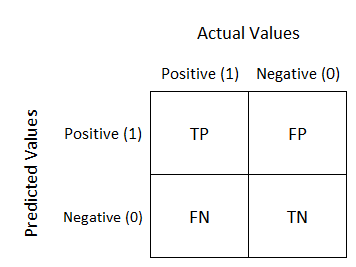

**“TP” = true positive; “FN” = false negative; “FP” = false positive; “TN” = true negative.**

In [ ]:
def accuracy(actual, predicted):
    # Accuracy = (TP + TN)/(TP + TN + FP + FN)
    return np.mean((actual == predicted).astype(int))

In [ ]:
def precision(actual, predicted):
    # Precision = (TP)/(TP + FP) = True pos out of the actual results
    
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted == 1)).astype(int))
    return TP/(TP + FP)

In [ ]:
def recall(actual, predicted):
    # Recall = (TP)/(TP + FN) = True pos out of the predicted results
    
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 0)).astype(int))
    return TP/(TP + FN)

In [ ]:
def f_score(actual , predicted):
    # F_Score = 2PR/(P+R)
    
    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

In [ ]:
def fisher(X_train1, X_train2, X_test, y_test):
    
    # 1. Find Projection Line
    W = find_w_cordinates(X_train1, X_train2)
    
    # 2. Find Threshold
    threshold = find_threshold(X_train1, X_train2, W)
    
    # 3. Find Predictions for the Test Data by Projecting onto W and comparing to the threshold
    projections, y_predicted = find_predictions(X_test, W, threshold)
    
    # Plot the projections
    plot_projections(projections, y_test, threshold)
    print('\n')
    print('W:\n',W)
    print('\n')
    print('Threshold:',threshold)
    print('accuracy:',accuracy(y_test , y_predicted))
    
    print("precision:",precision(y_test , y_predicted))
    print("recall:",recall(y_test , y_predicted))
    print("f score:",f_score(y_test , y_predicted))

## **FLDM1**

In [ ]:
X = df.iloc[:, 2:].values
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)

  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
np.random.seed(13123)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

X_train1 = X_train[y_train == 1]
X_train2 =  X_train[y_train == 0]

In [ ]:
fisher(X_train1, X_train2, X_test, y_test)

## **FLDM2**

In [ ]:
shuffled_cols = df.iloc[:, 2:].sample(frac=1, axis=1)
df2 = pd.concat([df.iloc[:, :2], shuffled_cols], axis=1)
X = df2.iloc[:, 2:].values
y = np.where(df2.iloc[:, 1].values == 'M', 1, 0)
np.random.seed(13123)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

X_train1 = X_train[y_train == 1]
X_train2 =  X_train[y_train == 0]

In [ ]:
fisher(X_train1, X_train2, X_test, y_test)

## **Logistic Regression**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
def batch_gradient_descent(X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    m=len(y)
    for i in range(iterations):
        gradient = (1/m)* np.dot(X.transpose(), (hypothesis(X,theta)- y))
        #w=w-ita*gradient
        theta = theta - learning_rate*gradient
        cost_history[i] = cost(X, y, theta)
        
    return theta,cost_history

In [ ]:
#function to predict the class of a test data point
def predict(X, theta, threshold=0.5):
    return (hypothesis(X, theta) >= threshold).astype(int)

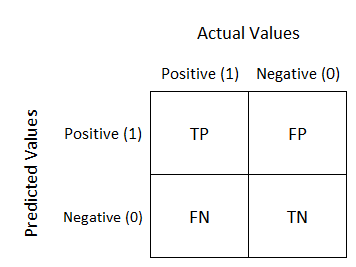

**“TP” = true positive; “FN” = false negative; “FP” = false positive; “TN” = true negative.**

In [ ]:
def accuracy(actual,predicted):
     return np.mean((actual == predicted).astype(int))

In [ ]:
def recall(actual, predicted):
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==0)).astype(int))
    return TP/(TP + FN)

In [ ]:
def f_score(actual , predicted):
    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

In [ ]:
#function to calculate precision of the classifier
def precision(actual, predicted):
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted ==1)).astype(int))
    return TP/(TP + FP)

In [ ]:
#function to calculate sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x) )

In [ ]:
#hypothesis for logistic regression
def hypothesis(X,theta):
    return sigmoid(np.dot(X, theta))

In [ ]:
#binary cross entropy cost function, i.e derivative which we have to minimize
def cost(X,y,theta):
    h = hypothesis(X,theta)
    return (-1/len(y))*(np.sum((y * np.log(h)) + (1-y)*np.log(1-h)))

## **LR1**

In [ ]:
# This snippet splits data into test, train and gives out theta

In [ ]:
X = df.iloc[:, 2:].values
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)

#concatenate a columns of ones (to accomodate the bias)
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 

#gaussian weight initialisations can be tried:
theta=np.random.randn(X.shape[1],1)

#split the data into training and testing data, change the test split here
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
# split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

# create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


In [ ]:
y_predicted = predict(X_test,theta) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

Q) What happens to testing accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7.

## REDUNDANT

In [ ]:
def predict_logistic(threshold=0.3):
  y_predicted = predict(X_test,theta,threshold) #we put inside it the respective threshold needed
  print("accuracy:" , accuracy(y_test , y_predicted))
  print("precision:",precision(y_test , y_predicted))
  print("recall:",recall(y_test , y_predicted))
  print("f score:",f_score(y_test , y_predicted))

In [ ]:
predict_logistic(0.3)

In [ ]:
predict_logistic(0.4)

In [ ]:
predict_logistic(0.5)

In [ ]:
predict_logistic(0.6)

In [ ]:
predict_logistic(0.7)

You must implement the above two learning tasks using Batch Gradient Descent, Mini-batch Gradient Descent and Stochastic Gradient Descent using learning rates 0.01, 0.001 and 0.0001. Plot the learning curves (Cost Function vs Iterations) for the same.

## **Batch Gradient Descent**

In [ ]:
def batch_gradient_descent(learning_rate=0.01, iterations=1500):
  #Batch Gradient Descent
  theta,cost_history = batch_gradient_descent(X_train,y_train,theta,learning_rate,iterations)
  prediction = predict(X, theta, threshold=0.5)
  print(prediction)
  plt.title('Learning curve (Cost Function vs Iterations), Weights = normal, LR = {} , itr = {}'.format(learning_rate, iterations))
  plt.plot(list(range(iterations)), cost_history, '-r') #plot the cost function.



In [ ]:
batch_gradient_descent(0.01)

In [ ]:
batch_gradient_descent(0.001)

In [ ]:
batch_gradient_descent(0.001)

In [ ]:
learning_rate=0.0001
iterations=500
#gradient descent without regularisation
theta,cost_history = batch_gradient_descent(X_train,y_train,theta,learning_rate,iterations)

In [ ]:
plt.title('Cost Function vs Iterations, Weights = normal, LR = 0.0001 , itr = 1500')
plt.plot(list(range(iterations)), cost_history, '-r') #plot the cost function.


**If you have low learning rate means your cost function will decrease slowly but in case of large learning rate cost function will decrease very fast.**

## **Mini-batch Gradient Descent**

In [ ]:
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size=32):
    cost_history = np.zeros(iterations)
    m = len(y)
    
    for i in range(iterations):
        # Shuffle dataset
        permutation = np.random.permutation(m)
        X_shuffle = X[permutation,:]
        y_shuffle = y[permutation]
        
        # Loop through each batch in the shuffled dataset
        for j in range(0, m, batch_size):
            X_batch = X_shuffle[j:j+batch_size,:]
            y_batch = y_shuffle[j:j+batch_size].reshape(-1, 1)
            
            # Calculate gradient using batch
            gradient = (1/batch_size)* np.dot(X_batch.transpose(), (hypothesis(X_batch,theta)- y_batch))
            
            # Update theta using the gradient and learning rate
            theta = theta - learning_rate*gradient
        
        # Calculate cost and store in history
        cost_history[i] = cost(X, y, theta)
        
    return theta, cost_history
def check_and_plot_mini_batch(learning_rate=0.01, iterations=1500):
  iterations=1500
  theta,cost_history = mini_batch_gradient_descent(X_train,y_train,theta,learning_rate,iterations)
  prediction = predict(X, theta, threshold=0.5)
  print(prediction)
  plt.title('Learning curve (Cost Function vs Iterations), Weights = normal, LR = 0.01 , itr = 1500')
  plt.plot(list(range(iterations)), cost_history, '-r') #plot the cost function.


In [ ]:
check_and_plot_mini_batch(learning_rate=0.01, iterations=1500)

In [ ]:
check_and_plot_mini_batch(learning_rate=0.001, iterations=1500)

In [ ]:
check_and_plot_mini_batch(learning_rate=0.0001, iterations=1500)

## **Stochastic Gradient Descent**

In [ ]:
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    m = len(y)
    
    for i in range(iterations):
        # Loop through each sample in the dataset
        for j in range(m):
            # Select a random sample from the dataset
            random_index = np.random.randint(0, m)
            x_i = X[random_index,:].reshape(1, X.shape[1])
            y_i = y[random_index].reshape(1, 1)
            
            # Calculate gradient for the selected sample
            gradient = np.dot(x_i.transpose(), (hypothesis(x_i,theta) - y_i))
            
            # Update theta using the gradient and learning rate
            theta = theta - learning_rate*gradient
            
        # Calculate cost and store in history
        cost_history[i] = cost(X, y, theta)
        
    return theta, cost_history

def check_and_plot_stochastic(learning_rate=0.01, iterations=1500):
  iterations=1500
  theta,cost_history = mini_batch_gradient_descent(X_train,y_train,theta,learning_rate,iterations)
  prediction = predict(X, theta, threshold=0.5)
  print(prediction)
  plt.title('Learning curve (Cost Function vs Iterations), Weights = normal, LR = 0.01 , itr = 1500')
  plt.plot(list(range(iterations)), cost_history, '-r') #plot the cost function.

In [ ]:
check_and_plot_stochastic(0.01, 1500)

In [ ]:
check_and_plot_stochastic(0.001, 1500)

In [ ]:
check_and_plot_stochastic(0.000 1, 1500)

## **LR2**

In [ ]:
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)

# X = (X - np.mean(X, axis=0))/np.std(X,axis=0)

ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 

theta=np.random.randn(X.shape[1],1)

np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


In [ ]:
y_predicted = predict(X_test,theta) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

##Logistic Regression Modified

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

class Logistic_Regression:

  def __init__(self, learning_rate = 0.001, epochs = 1000):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
  
  #function to predict the class of a test data point
  def predict(self, X, theta, threshold=0.5):
      return (self.hypothesis(self.X, theta) >= threshold).astype(int)

  def accuracy(self, actual,predicted):
    return np.mean((actual == predicted).astype(int))

  def recall(self, actual, predicted):
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==0)).astype(int))
    return TP/(TP + FN)

  def f_score(self, actual , predicted):
    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

    #function to calculate precision of the classifier
  def precision(self, actual, predicted):
      TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted ==1)).astype(int))
      FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted ==1)).astype(int))
      return TP/(TP + FP)
  #function to calculate sigmoid
  def sigmoid(self, x):
      return 1/(1 + np.exp(-x) )
    #hypothesis for logistic regression
  def hypothesis(self, X,theta):
      return sigmoid(np.dot(X, theta))
    #binary cross entropy cost function, i.e derivative which we have to minimize
  def cost(self, X,y,theta):
      h = hypothesis(X,theta)
      return (-1/len(y))*(np.sum((y * np.log(h)) + (1-y)*np.log(1-h)))
  def gradient_descent(self, X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    m=len(y)
    for i in range(iterations):
        gradient = (1/m)* np.dot(X.transpose(), (hypothesis(X,theta)- y))
        #w=w-ita*gradient
        theta = theta - learning_rate*gradient
        cost_history[i] = cost(X, y, theta)
        
    return theta,cost_history

